Presenté par:
    <ul>
    <li>
    <p><strong>TERRAB Wiam </strong> </p>
    </li>
    <li>
     <p><strong>ZOUGUAGH Kaoutar</strong></p>
    </li>
    <li>
     <p><strong>BERRI Malak </strong></p>
    </li>
    </ul>
     Encadré par:
 <ul>
    <li>
        <p><strong>M.Abdelwahab NAJI</strong> </p>
    </li>
     </ul>

   <div style="background-color:yellow;border-radius:50px 0px;">
    <p style="font-size:40px;color:black; padding:40px; margin-left:25%;font-weight:bolder;">Projet Time Series</p>
        </div>


**Objective:** Construire un modèle avec 3 méthodes pour prévoir la demande de trafic passager dans les avions. Les données sont classées par date/heure et le nombre de passagers voyageant par mois.

## Import Libraries <a name="Import-Libraries"></a>

In [1]:
from datetime import datetime
import seaborn as sns
import numpy as np             # pour les calculs numériques comme log, exp, sqrt, etc.
import pandas as pd  # pour la lecture et le stockage des données, le prétraitement
from pandas import read_csv
import matplotlib.pylab as plt # pour la visualisation
%matplotlib inline 
# pour s'assurer que les graphiques matplotlib sont générés directement dans le notebook Jupyter            
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 4  # Définit la taille par défaut des figures matplotlib


<div style="background-color:yellow; border-radius:20px 0px;">
    <p style="font-size:25px; color:black; padding:15px; margin-left:39%; font-weight:bolder;">Data loading</p>
</div>

- Dans cette partie de code , on va charger les données , les diviser en une partie d'apprentissage , et une partie de test .
- On consacre les dernières 15 année pour le test . 

Nombre d'observations dans l'ensemble d'apprentissage : 129
Nombre d'observations dans l'ensemble de test : 15


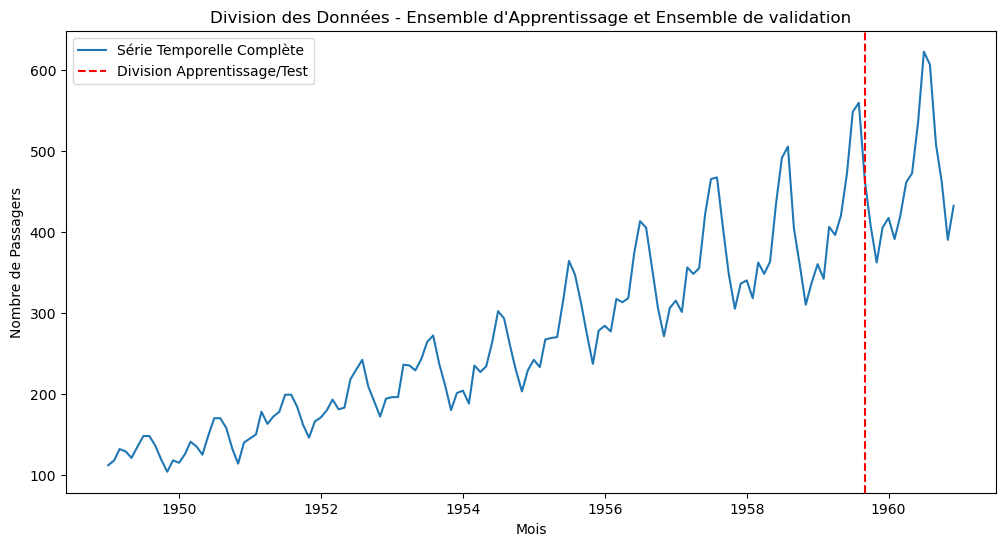

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Charger les données
file_path = 'C:/Users/21269/Documents/projet ts/AirPassengers (1).csv'
dataset = pd.read_csv(file_path)

# Convertir la colonne 'Month' en format de date
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

# Définir la colonne 'Month' comme index
indexedDataset = dataset.set_index(['Month'])

# Diviser les données en ensemble d'apprentissage (90%) et ensemble de test (10%)
train_size = int(len(indexedDataset) * 0.9)
train_data, test_data = indexedDataset.iloc[0:train_size], indexedDataset.iloc[train_size:len(indexedDataset)]
indexedDataset.iloc[train_size:len(indexedDataset)]

# Préparer les données
train, test = train_data.values, test_data.values
# Nombre d'observations dans l'ensemble d'apprentissage (train)
num_observations_train = len(train_data)
print("Nombre d'observations dans l'ensemble d'apprentissage :", num_observations_train)

# Nombre d'observations dans l'ensemble de test
num_observations_test = len(test_data)
print("Nombre d'observations dans l'ensemble de test :", num_observations_test)

# Créer un graphique
plt.figure(figsize=(12, 6))
plt.plot(indexedDataset.index, indexedDataset['#Passengers'], label='Série Temporelle Complète')
plt.axvline(train_data.index[-1], color='r', linestyle='--', label='Division Apprentissage/Test')
plt.xlabel('Mois')
plt.ylabel('Nombre de Passagers')
plt.title('Division des Données - Ensemble d\'Apprentissage et Ensemble de validation')
plt.legend()
plt.show()



<div style="background-color:yellow; border-radius:20px 0px;">
    <p style="font-size:25px; color:black; padding:15px; margin-left:39%; font-weight:bolder;">Modele Evaluation</p>
</div>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>Persistence model evaluation</b> </p>

- Le modèle de persistance agit comme une ligne de base dans notre analyse, servant de référence pour comparer les performances des différents modèles. Il est également appelé un "test harness".
  
- Il s'agit d'un modèle naïf de prédiction qui ne fait aucune supposition spécifique sur les données, telles que la stationnarité ou la normalité.

- Si les performances d'un modèle particulier sont proches ou même inférieures à celles du modèle de persistance, cela indique un modèle faible, et il est recommandé de le remplacer par un modèle plus performant.

In [3]:
# Import necessary libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt


# Charger les données
df = pd.read_csv('train_data.csv', header=None, index_col=0, parse_dates=True)

# Convertir le DataFrame en une série en utilisant la fonction squeeze
series = df.squeeze()

# Convertir les valeurs de la série en numériques
series = pd.to_numeric(series, errors='coerce')
# Prepare data
X = series.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Walk-forward validation
history = list(train)  # Make a copy of the training set for each iteration
predictions = list()

for i in range(len(test)):
    # Predict using the persistence model
    yhat = history[-1]
    
    # Store the prediction
    predictions.append(yhat)
    
    # Update the training set for the next iteration
    obs = test[i]
    history.append(obs)
    
    print('> Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


> Predicted=227.000, Expected=234.000
> Predicted=234.000, Expected=264.000
> Predicted=264.000, Expected=302.000
> Predicted=302.000, Expected=293.000
> Predicted=293.000, Expected=259.000
> Predicted=259.000, Expected=229.000
> Predicted=229.000, Expected=203.000
> Predicted=203.000, Expected=229.000
> Predicted=229.000, Expected=242.000
> Predicted=242.000, Expected=233.000
> Predicted=233.000, Expected=267.000
> Predicted=267.000, Expected=269.000
> Predicted=269.000, Expected=270.000
> Predicted=270.000, Expected=315.000
> Predicted=315.000, Expected=364.000
> Predicted=364.000, Expected=347.000
> Predicted=347.000, Expected=312.000
> Predicted=312.000, Expected=274.000
> Predicted=274.000, Expected=237.000
> Predicted=237.000, Expected=278.000
> Predicted=278.000, Expected=284.000
> Predicted=284.000, Expected=277.000
> Predicted=277.000, Expected=317.000
> Predicted=317.000, Expected=313.000
> Predicted=313.000, Expected=318.000
> Predicted=318.000, Expected=374.000
> Predicted=

- le RMSE de 39.469 signifie que, en moyenne, notre modèle de persistance sous-estime ou surestime le nombre réel de passagers de 39.469 personnes on doit donc chercher un modèle qui minimise cette erreur .

<div style="background-color:yellow; border-radius:20px 0px;">
    <p style="font-size:25px; color:black; padding:15px; margin-left:39%; font-weight:bolder;">Data analysis</p>
</div>


<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>1-</b>    Summary Statistics </p>

In [4]:
print("Résumé statistique du 'train_data.csv'")
print(train_data.describe())

Résumé statistique du 'train_data.csv'
       #Passengers
count   129.000000
mean    259.496124
std     105.959022
min     104.000000
25%     172.000000
50%     237.000000
75%     337.000000
max     559.000000


<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px"><b>En moyenne,</b> le trafic de passagers semble être autour de 259.5, indiquant un niveau modéré d'activité.</p></li>
    <li><p style="font-size:17px"><b>La variabilité,</b> mesurée par l'écart type, est relativement élevée, ce qui suggère des fluctuations importantes dans le trafic de passagers.</p></li>
    <li><p style="font-size:17px"><b>Les quartiles</b> indiquent que la majorité des observations se situent entre 104 et 337 passagers, avec une médiane de 237, montrant une certaine asymétrie dans la distribution.</p></li>
    <li><p style="font-size:17px"><b>La valeur maximale</b> de 559 suggère la présence de pointes ou d'événements exceptionnels dans les données.</p></li>
</ul>



<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>2-</b> Line Plot </p>

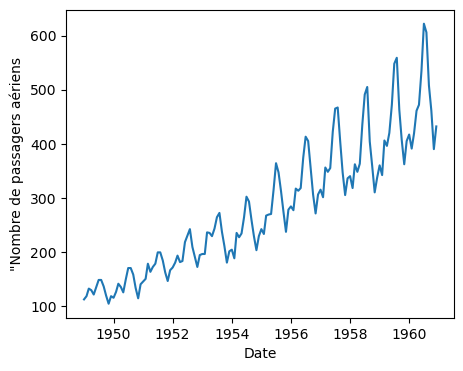

In [5]:
## plot graph
plt.xlabel('Date')
plt.ylabel('"Nombre de passagers aériens')
plt.plot(indexedDataset)

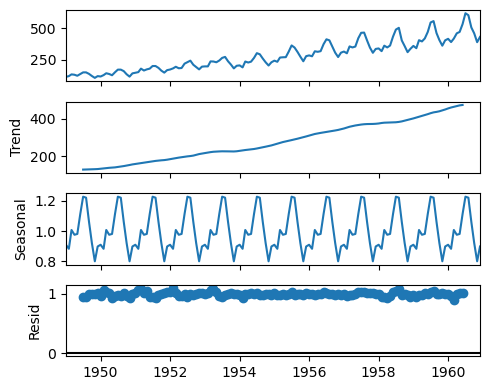

In [6]:
# Importer la bibliothèque
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Appliquer la décomposition saisonnière
resultat = seasonal_decompose(indexedDataset, model='multiplicatif')

# Tracer les composantes décomposées
resultat.plot()

# Afficher le graphique
plt.show()


<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li>
        <p><strong>Tendance globale à la hausse :</strong> L'analyse des données indique une tendance générale à la hausse du trafic des passagers aériens au fil du temps. Cela peut refléter une augmentation constante de la demande de voyages aériens.</p>
    </li>
    <li>
        <p><strong>Composante saisonnière :</strong> La présence d'une composante saisonnière suggère des variations périodiques dans le trafic des passagers. Cela pourrait être lié à des facteurs tels que les saisons de voyage, les vacances, ou d'autres motifs saisonniers.</p>
    </li>
    <li>
        <p><strong>Nature multiplicative :</strong> Il est clair que la série est de nature multiplicative, car l'amplitude relative de chaque composante saison croît en fonction de la tendance globale de la série.</p>
    </li>
    <li>
        <p><strong>Non-stationnarité due à la saisonnalité :</strong> La série temporelle est probablement non stationnaire en raison de la composante saisonnière et de la tendance observée. Cela signifie que les propriétés statistiques de la série changent avec le temps.</p>
    </li>
    <li>
        <p><strong>Fréquence de la saisonnalité :</strong> La série contient uen saisonalité, ce qui pourrait signifier que les schémas de voyage spécifiques ou les périodes d'activité accrue se reproduisent à peu près de la même manière à chaque période saisonnière (chaque année ou 10 à 11 mois ), sans de grandes variations.</p>
    </li>
</ul>




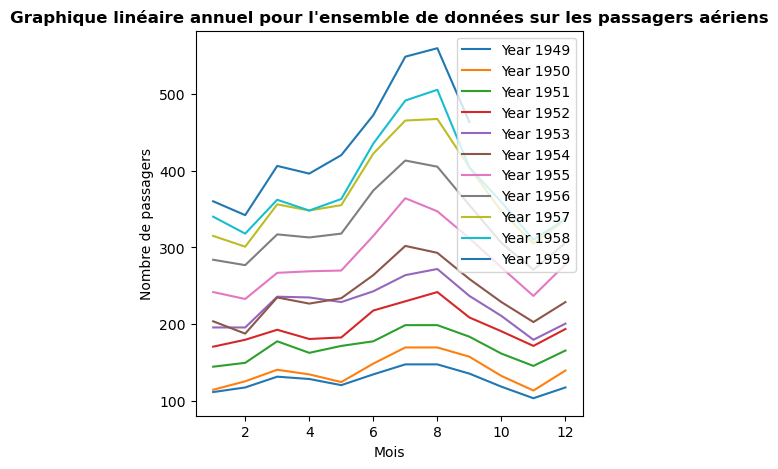

In [7]:
import matplotlib.pyplot as plt
# Grouper par année
groups = train_data.groupby(pd.Grouper(freq='A'))

# Configurer la disposition des sous-graphiques
fig, ax = plt.subplots(figsize=(5, 5))

# Titre principal
plt.title("Graphique linéaire annuel pour l'ensemble de données sur les passagers aériens", fontweight='bold')

# Plot pour chaque année
for name, group in groups:
    # Plot
    ax.plot(group.index.month, group['#Passengers'], label=f'Year {name.year}')

# Ajouter des étiquettes
plt.xlabel('Mois')
plt.ylabel('Nombre de passagers')
plt.legend()
plt.show()

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:14px"><b>Nous pouvons clairement voir  des baisses en février et novembre, ainsi qu'une hausse en été, suggère des tendances saisonnières dans le nombre de passagers aériens, avec des mois de basse activité hors saison et une augmentation pendant les périodes estivales. Ce schéma apparaît le même chaque année, bien que à différents niveaux.</b></p></li>
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>3-</b> Histogram and density plot</p>

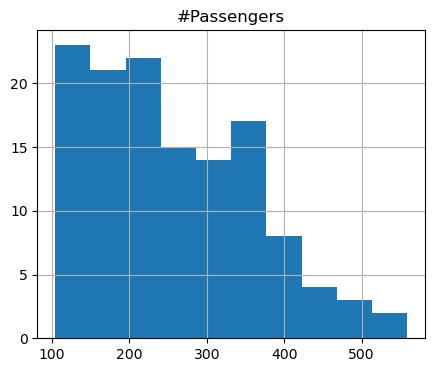

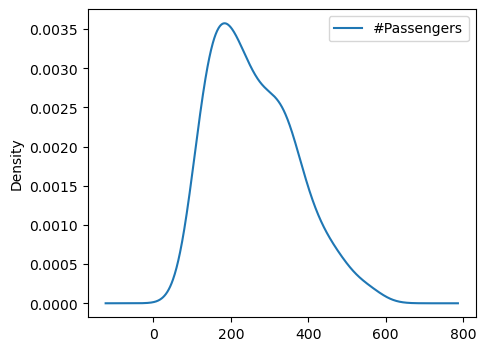

In [8]:
import matplotlib.pyplot as pyplot
import seaborn as sns
train_data.hist()
pyplot.subplots_adjust(hspace=0.4)
train_data.plot(kind='kde')
pyplot.show()

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px">La distribution est non-Gaussienne.</p></li>
    <li><p style="font-size:17px">Une asymetrie positive car il y a une concentration plus élevée des valeurs du côté gauche de la moyenne et une dispersion plus large du côté droit.</p></li>
<li><p style="font-size:17px">on peut donc essayer de transformer les données avec un log tranform ou un box-cox , ceci  est d'une grande  utilité , pour réduire la dispersion des données,et  pour que le modèle arrive à capturer les patterns dans les données  facilement,car plus on a de variabilité dans les données plus c'est difficile à modéliser le problème .</p></li>
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>4-</b> Box and whisker plots</p>

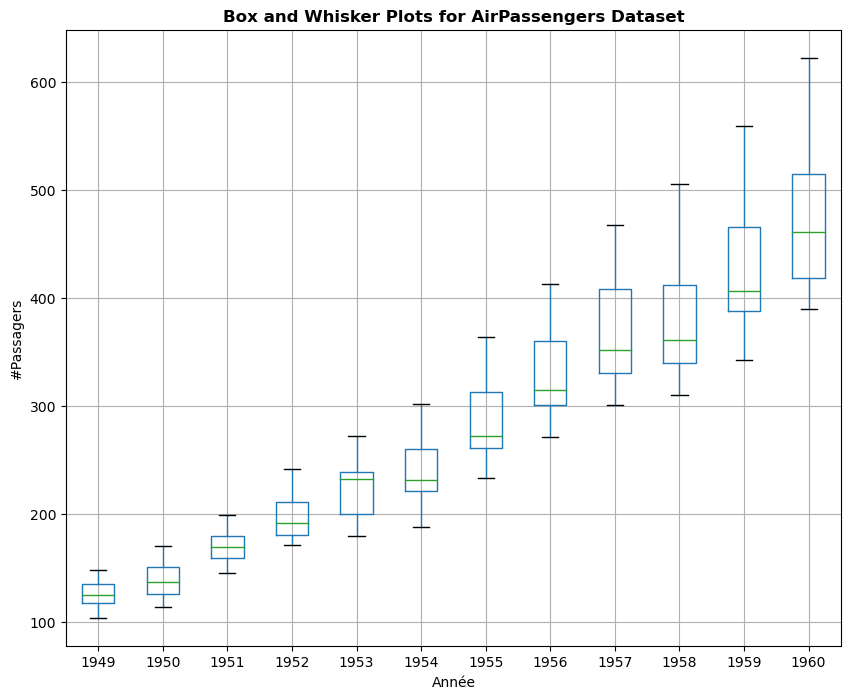

In [9]:
from pandas import Grouper
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
file_path = 'AirPassengers (1).csv'
dataset = pd.read_csv(file_path)
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

# Grouper par année
groups = indexedDataset['1949':'1960'].groupby(Grouper(freq='A'))
years = pd.DataFrame()

# Créer un boxplot
plt.figure(figsize=(10, 8))
plt.title("Box and Whisker Plots for AirPassengers Dataset", fontweight='bold')

for name, group in groups:
    years[name.year] = group['#Passengers'].values

# Ajouter des labels aux axes
plt.xlabel('Année')
plt.ylabel('#Passagers')

# Afficher le graphique
years.boxplot()
plt.show()


<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px">Les valeurs médianes pour chaque année (ligne verte) peuvent montrer <b>un trend</b> à la hausse(croissant).</p></li>
      <li><p style="font-size:17px">Pour les années <b>1949, 1950, et 1951</b> le boxplot suggère une faible dispersion des données avec une concentration étroite autour de la médiane, indiquant une stabilité ou cohérence dans les mesures.</p></li>
    <li><p style="font-size:17px"> Pour les années <b>1957 à 1960</b>, le boxplot suggère une grande dispersion des données avec une concentration plus importante vers le bas de la distribution, indiquant une variabilité significative. puisque pour des intervalles de meme tailles prises dans des temps differents on doit avoir presque la meme variabilité pour qu'on  puisse parler de la stationnarité.</p></li>
      <li><p style="font-size:17px">Abscence des <b>outliers</b> chaque année.</p></li>
    <li><p style="font-size:17px">Avant de créer aucun modèle ,voyons voir si nos données sont stationnaires ?</p></li>

</ul>


# **nous vérifions maintenant la stationnarité des données.**

***Note : Ces données ne sont pas stationnaires car la moyenne change et n'est pas constante.***


<p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>- Effectuons des tests pour vérifier si une série est stationnaire ou non:</b></p>

A. Il existe 2 façons de vérifier la stationnarité d'une série temporelle :

 a) ***Statistiques mobiles***(sesonal plot) - Tracez la moyenne mobile ou l'écart type mobile pour voir s'ils varient dans le temps. C'est une technique visuelle.
 
 b) ****Test ADCF - Test de Dickey–Fuller augmenté**** - Il est utilisé pour nous fournir diverses valeurs qui peuvent aider à identifier la stationnarité. # L'hypothèse nulle stipule qu'une série temporelle n'est pas stationnaire. Elle comprend une statistique de test et certaines valeurs critiques # pour certains niveaux de confiance. Si la statistique de test est inférieure aux valeurs critiques, nous pouvons rejeter # l'hypothèse nulle et affirmer que la série est stationnaire. Le test ADCF nous donne également une valeur p. Selon l'hypothèse nulle, des valeurs p plus basses sont meilleures.
 
 c) ****Statistique sommaire**** - Une analyse des statistiques sommaires peut également être utile dans l'évaluation de la stationnarité de la série temporelle.

 <p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>- Effectuons maintenant le test des statistiques mobiles (Rolling Statistics):</b></p>


In [10]:
# Déterminer les statistiques roulantes
rolmean = train_data.rolling(window=12).mean()  # la taille de la fenêtre 12 indique 12 mois, fournissant la moyenne mobile sur une base annuelle
rolstd = train_data.rolling(window=12).std()

# Afficher la moyenne mobile et l'écart type mobile
print(rolmean, rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1959-05-01   397.083333
1959-06-01   400.166667
1959-07-01   404.916667
1959-08-01   409.416667
1959-09-01   414.333333

[129 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1959-05-01    60.008270
1959-06-01    63.009138
1959-07-01    71.987951
1959-08-01    80.049369
1959-09-01    81.485451

[129 rows x 1 columns]


<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>2-</b> Seasonal Line Plots </p>

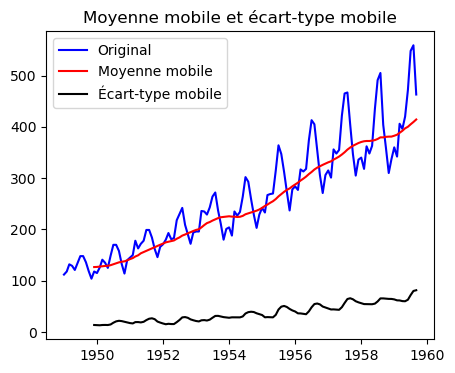

In [11]:
# Tracer les statistiques roulantes
orig = plt.plot(train_data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
std = plt.plot(rolstd, color='black', label='Écart-type mobile')
plt.legend(loc='best')
plt.title('Moyenne mobile et écart-type mobile')
plt.show(block=False)


Dans le graphique ci-dessus, nous constatons que la moyenne mobile elle-même présente une composante de tendance, bien que l'écart type mobile soit assez constant dans le temps  cela  indique une stabilité dans la variabilité de la série. Pour que notre série temporelle soit stationnaire, nous devons nous assurer que les deux statistiques roulantes, c'est-à-dire la moyenne et l'écart type, restent constantes dans le temps. Ainsi, les courbes des deux doivent être parallèles à l'axe des x, ce qui n'est pas le cas dans notre situation.

**Pour renforcer davantage notre hypothèse selon laquelle la série temporelle n'est pas stationnaire, effectuons le test ADCF (Augmented Dickey–Fuller test).**

In [12]:
from statsmodels.tsa.stattools import adfuller
# Effectuer le test de Dickey-Fuller augmenté (ADCF)
result = adfuller(train_data['#Passengers'], autolag='AIC')
print('Test Statistic:', result[0])
print('P-value:', result[1])

Test Statistic: 0.4609596256839466
P-value: 0.9836369274002921


Note : Pour qu'une série temporelle soit stationnaire, son test ADCF (Augmented Dickey–Fuller) doit avoir :

 <p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>- Une valeur de p (p-value) basse (selon l'hypothèse nulle).</b></p>


D'après les résultats du test ADCF ci-dessus, nous constatons que la valeur de p (p-value, pouvant au maximum être de 1,0) est très élevée. Par conséquent, nous pouvons affirmer en toute sécurité que **notre série temporelle n'est actuellement pas stationnaire**.

 <div style="background-color:black; border-radius:20px 0px;">
    <p style="font-size:25px; color:white; padding:15px; margin-left:10%; font-weight:bolder;">Transformation des données pour atteindre la stationnarité</p>
</div>


Il existe plusieurs façons d'atteindre la stationnarité par transformation des données, telles que l'application du logarithme en base 10 ($\log_{10}$), du logarithme naturel ($\log_{e}$), du carré, de la racine carrée, du cube, de la racine cubique, etc.

Commençons par les transformations logarithmiques. Notre objectif est de supprimer la composante de tendance. Ainsi, des courbes plus plates (c'est-à-dire, parallèles à l'axe des x) pour les séries temporelles et une moyenne mobile après l'application du logarithme indiqueraient que notre transformation des données a bien fonctionné.

### 1. Log Scale Transformation  <a name="log"></a>

Statistique ADF : -1.606954
Valeur p : 0.480099


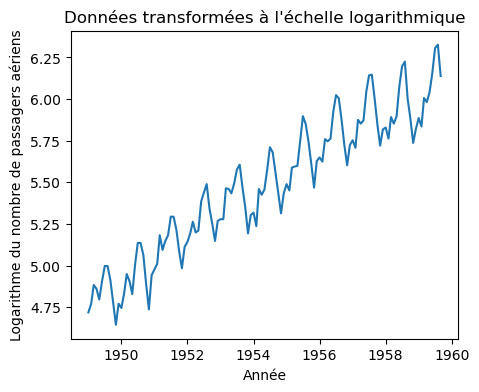

In [13]:
from statsmodels.tsa.stattools import adfuller
# Estimation de la tendance
train_data_logScale = np.log(train_data)
plt.xlabel('Année')
plt.ylabel('Logarithme du nombre de passagers aériens')
plt.title('Données transformées à l\'échelle logarithmique')
plt.plot(train_data_logScale)
result2 = adfuller(train_data_logScale)

# Afficher la statistique de test et la valeur p
print('Statistique ADF : %f' % result2[0])
print('Valeur p : %f' % result2[1])


- **On voit bien que la p_value a bien diminué , mais ce n'est pas suffisant,on va utiliser donc la technique du differencing.sur les données transformés .**

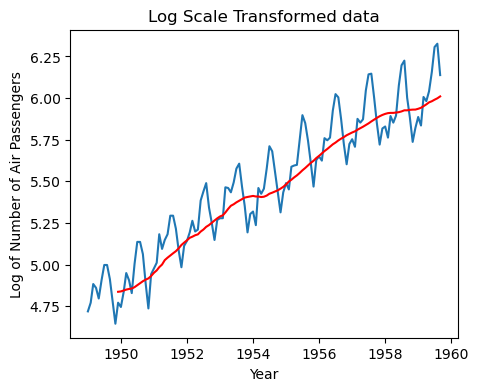

In [14]:
# La transformation ci-dessous est nécessaire pour rendre la série stationnaire

movingAverage = train_data_logScale.rolling(window=12).mean()
movingSTD = train_data_logScale.rolling(window=12).std()
plt.title('Rolling Mean & Standard Deviationfor Log Transformation')
plt.ylabel('Log of Number of Air Passengers')
plt.xlabel('Year')

plt.title('Log Scale Transformed data')
plt.plot(train_data_logScale)
plt.plot(movingAverage, color='red')

D'après le graphique ci-dessus, nous constatons que même si la moyenne mobile n'est pas stationnaire, elle est tout de même meilleure que dans le cas précédent, où aucune transformation n'avait été appliquée à la série. Nous pouvons au moins dire que nous allons dans la bonne direction.

Nous savons d'après le graphique ci-dessus que tant la série temporelle à l'échelle logarithmique que sa moyenne mobile ont une composante de tendance. Ainsi, nous pouvons appliquer une intuition élémentaire : la soustraction de l'une par l'autre devrait supprimer la composante de tendance des deux. C'est comme :

échelle logarithmique L = partie stationnaire(L1) + tendance (LT)  
moyenne mobile de l'échelle logarithmique  A = partie stationnaire  (A1) + tendance  (AT) 
série résultante  R = L - A = (L1+LT) - (A1+AT) = (L1-A1) + (LT-AT) \)

Puisque L et A sont des séries et que leur moyenne mobile, leur tendance sera plus ou moins la même, donc \( LT-AT \) est presque égal à 0. Par conséquent, la composante de tendance sera presque entièrement éliminée. Et nous avons,

\( R = L1 - A1 \), notre courbe finale sans tendance."

In [15]:
datasetLogScaleMinusMovingAverage = train_data_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


### **Etape pour Tester la Stationnarité**

In [16]:
def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  # Remove ['Passengers']
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


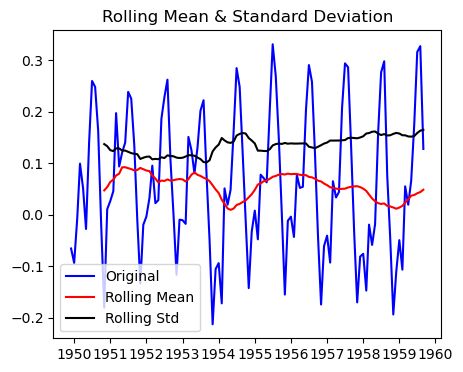

Results of Dickey Fuller Test:
Test Statistic                  -2.984349
p-value                          0.036382
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinusMovingAverage)

D'après le graphique ci-dessus, nous observons que notre intuition selon laquelle *"soustraire deux séries liées ayant des composantes de tendance similaires rendra le résultat stationnaire"* est correcte. Nous constatons que :

1. La p-value a diminué de 0.98 à 0.036.
Ainsi, à partir du points ci-dessus, nous pouvons dire que notre série donnée est stationnaire.

Cependant, dans un esprit d'obtenir une précision plus élevée, explorons et essayons de trouver une échelle meilleure que notre échelle actuelle du logarithme.

Essayons la décroissance exponentielle.

### 2. Exponential Decay Transformation   <a name="exp"></a>

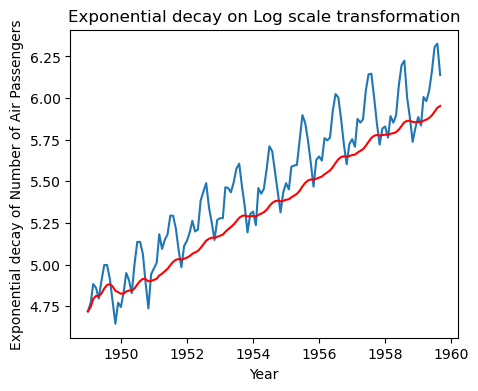

In [18]:
# Let us try out Exponential decay.
# Basically plotting exponential decay on log scale transformation only

exponentialDecayWeightedAverage = train_data_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.title('Exponential decay on Log scale transformation')
plt.xlabel('Year')
plt.ylabel('Exponential decay of Number of Air Passengers')

plt.plot(train_data_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

D'après le graphique ci-dessus, il semble que la décroissance exponentielle n'offre pas d'avantage significatif par rapport à l'échelle logarithmique, car les courbes correspondantes sont similaires. Cependant, en statistiques, les conclusions ne peuvent pas être tirées simplement en regardant les courbes. Par conséquent, nous effectuons à nouveau le test de Dickey-Fuller augmenté (ADCF) sur la série de décroissance ci-dessous.

Cela est une étape visant à éliminer les tendances saisonnières et à rendre la série résiduelle plus stationnaire. on va **creer une nouvelle série temporelle qui représente la différence entre la série originale transformée à l'échelle logarithmique et sa moyenne mobile pondérée exponentielle**

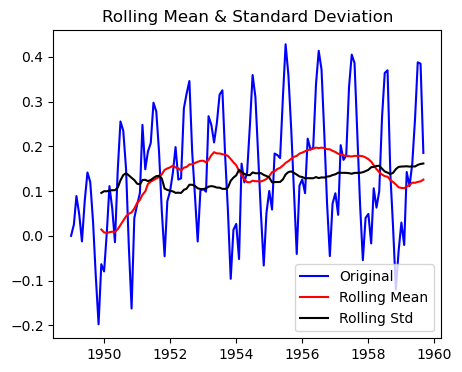

Results of Dickey Fuller Test:
Test Statistic                  -3.373447
p-value                          0.011898
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [19]:
datasetLogScaleMinusExponentialMovingAverage = train_data_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

Nous observons que la série temporelle est stationnaire et que les séries pour la moyenne mobile et l'écart type sont presque parallèles à l'axe des x, indiquant l'absence de tendance. De plus :

La valeur de p a diminué de 0,022 à 0,01.
Cela  indiquent que notre transformation actuelle est meilleure que la transformation logarithmique précédente. Même si nous n'avons pas pu observer de différences en regardant visuellement les graphiques, les tests confirment que la décroissance est bien meilleure.

Cependant, essayons une fois de plus pour voir s'il existe une solution encore meilleure. Nous allons utiliser la technique de décalage temporel simple, qui consiste simplement à :

on a les observations suivante:
$ x0, x1, x2, x3, .... xn $  

Les valeurs décalées seront :   
$ null, x0, x1, x2,.... xn $   

Ainsi, la série temporelle avec des valeurs décalées dans le temps est :  
$ null, (x1-x0), (x2-x1), (x3-x2), (x4-x3),.... (xn-x_{n-1}) $   

# 3. Transformation avec differencing seule 

ADF Statistic: -1.443514
p-value: 0.561246


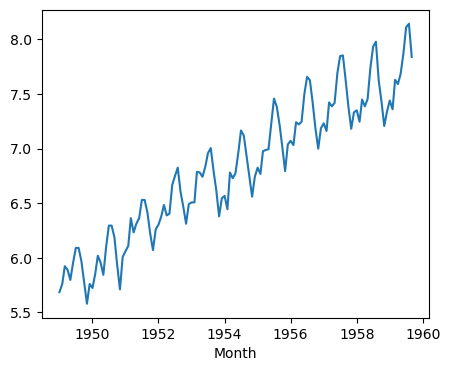

In [20]:
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

# Assurez-vous que la colonne '#Passengers' est dans le DataFrame train_data
# Vous pouvez supposer que train_data est un DataFrame avec une colonne temporelle et une colonne '#Passengers'

# Appliquer la transformation de Box-Cox à la colonne '#Passengers'
transformed_data, lambda_value = boxcox(train_data['#Passengers'].values)

# Créer une nouvelle série temporelle avec les données transformées
df = pd.Series(transformed_data, index=train_data.index)

# Tracer la série temporelle transformée
sns.lineplot(data=df)

# Appliquer le test de Dickey-Fuller augmenté (ADF) à la série transformée
result2 = adfuller(transformed_data)

# Afficher la statistique du test ADF et la valeur p
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])


ADF Statistic: -2.468411
p-value: 0.123351


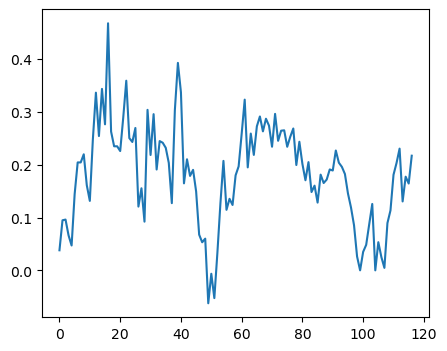

In [21]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# inverser la diffrence
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

#il est imperative de revenir à l'echelle des données originales pour pouvoir faire des comparaisons et rendre
#les données interpréstables 


stationnarity=difference(df,12)

sns.lineplot(data=stationnarity)
result3 = adfuller(stationnarity.values)
# Print the test statistic and p-value
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])

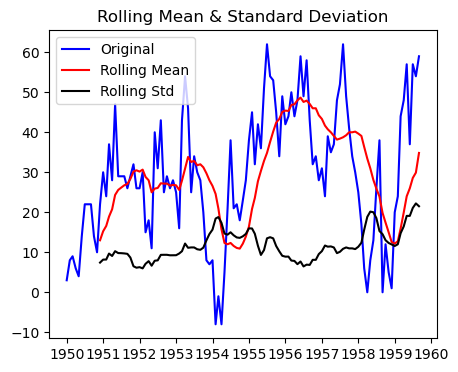

Results of Dickey Fuller Test:
Test Statistic                  -3.292214
p-value                          0.015230
#Lags Used                       2.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


In [22]:
# Différenciation de la série temporelle avec un décalage de 12
stationnarity = train_data.diff(12).dropna()
test_stationarity(stationnarity)

In [23]:
# Sauvegarder la série temporelle stationnarisée dans un fichier CSV
stationnarity.to_csv('stationary.csv', index=False)

# 4. Transformation par Décalage Temporel (differencing sur les données transformer )<a name="shift"></a>

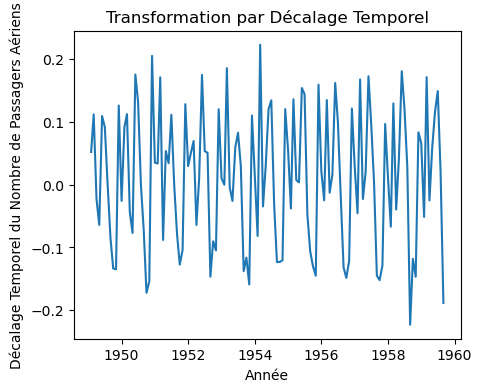

In [24]:
# Ici, le décalage (lag) est égal à 1 lors du décalage de la série temporelle logarithmique
datasetLogDiffShifting = train_data_logScale - train_data_logScale.shift()
plt.title('Transformation par Décalage Temporel')
plt.xlabel('Année')
plt.ylabel('Décalage Temporel du Nombre de Passagers Aériens')
plt.plot(datasetLogDiffShifting)


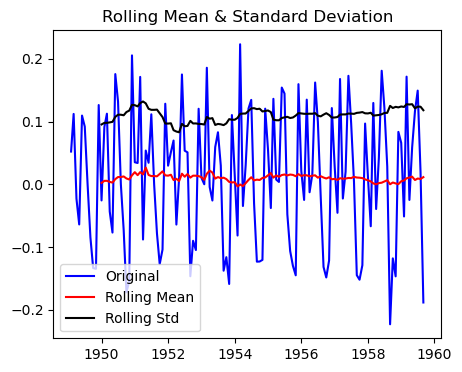

Results of Dickey Fuller Test:
Test Statistic                  -2.843815
p-value                          0.052283
#Lags Used                      12.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

En résumé, les graphiques visuels suggèrent que le résultat le plus satisfaisant est obtenu avec la transformation logarithmique, rendant la série ainsi que les valeurs statistiques des moyennes mobiles et des écarts types mobiles plates et stationnaires. Cependant, le test augmenté de stationnarité Dickey-Fuller (ADCF) présente une valeur de p de 0,03, moins favorable que la valeur de 0,01 obtenue avec la décroissance exponentielle.

Malgré la légère diminution de la valeur de p, **nous choisissons par souci de simplicité d'opter pour l'échelle logarithmique**
Cette décision est motivée par la facilité de manipulation mathématique, la stabilisation de la variance, et surtout la possibilité de revenir à l'échelle d'origine lors des prévisions. L'utilisation du logarithme simplifie les analyses, et les opérations sur **cette échelle correspondent à des transformations multiplicatives sur l'échelle d'origine**, ce qui facilite l'interprétation des résultats.

Ensuite, nous procéderons à **la décomposition des trois composantes de la série à échelle logarithmique**en utilisant une fonction de la bibliothèque système. Cette étape permettra d'isoler la tendance et la saisonnalité, laissant la partie résiduelle pour une analyse plus précise de ses caractéristiques.

 <p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>Après avoir expérimenté quatre méthodes différentes (différenciation, échelle logarithmique, décroissance exponentielle, différenciation sur échelle logarithmique), la méthode la plus appropriée pour rendre la série temporelle stationnaire est l'utilisation de l'échelle logarithmique.</b></p>

 <div style="background-color:black; border-radius:20px 0px;">
    <p style="font-size:25px; color:white; padding:15px; margin-left:25%; font-weight:bolder;">Analyse de la stationarité des residus</p>
</div>



 <p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>Avant la transformation</b></p>


Résultats du test de Dickey-Fuller sur les résidus :
Test Statistic                -6.447877e+00
p-value                        1.549563e-08
#Lags Used                     7.000000e+00
Number of Observations Used    1.090000e+02
Critical Value (1%)           -3.491818e+00
Critical Value (5%)           -2.888444e+00
Critical Value (10%)          -2.581120e+00
dtype: float64


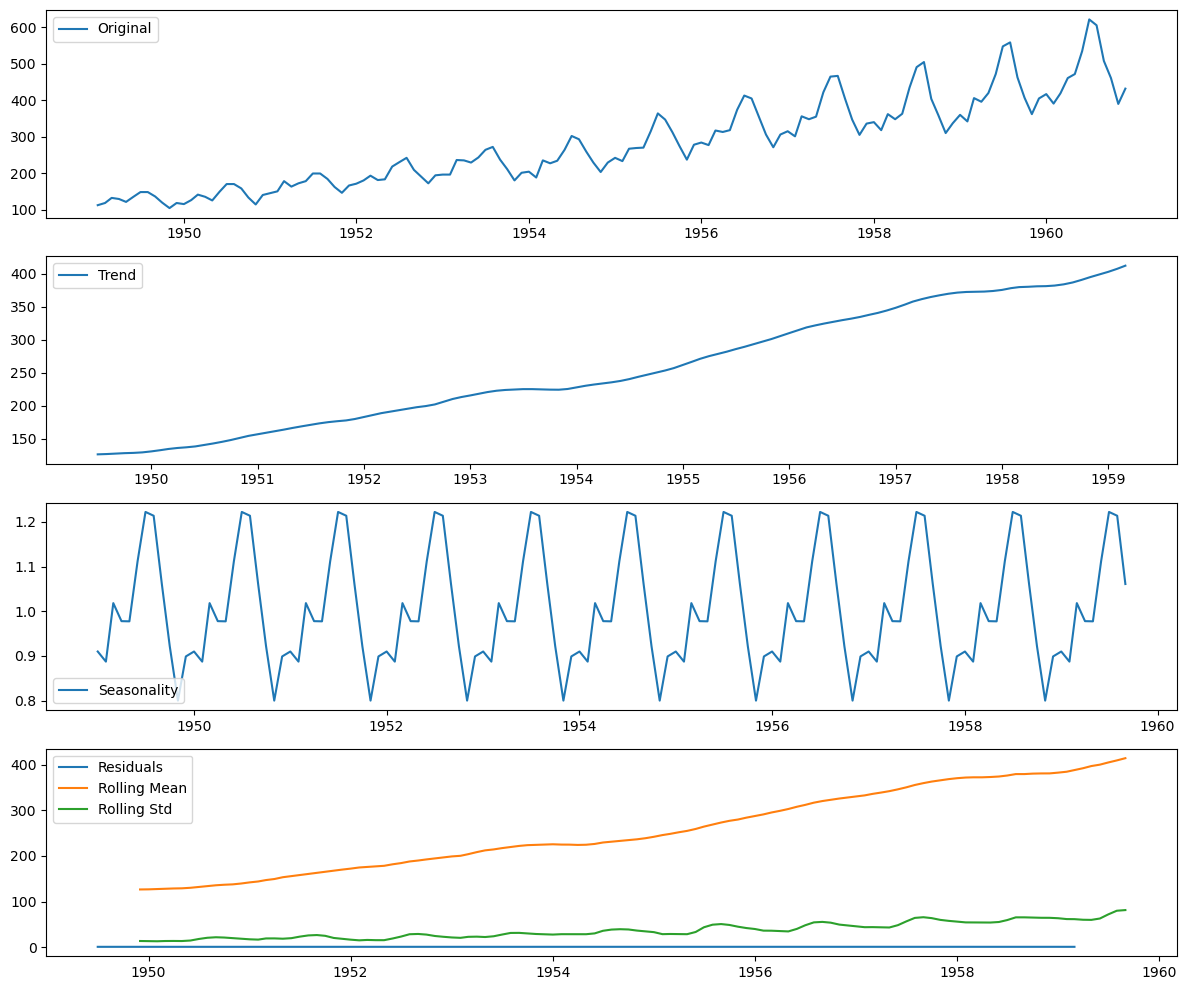

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Appliquer la décomposition saisonnière
resultat = seasonal_decompose(train_data, model='multiplicatif')

# Calculer la moyenne mobile et l'écart type mobile
rolling_mean = train_data.rolling(window=12).mean()
rolling_std = train_data.rolling(window=12).std()

# Tracer les composantes décomposées avec la moyenne mobile et l'écart type mobile
plt.figure(figsize=(12, 10))

# Série temporelle originale
plt.subplot(411)
plt.plot(indexedDataset, label='Original')
plt.legend(loc='best')

# Tendance
plt.subplot(412)
plt.plot(resultat.trend, label='Trend')
plt.legend(loc='best')

# Saisonnalité
plt.subplot(413)
plt.plot(resultat.seasonal, label='Seasonality')
plt.legend(loc='best')

# Résidus
plt.subplot(414)
plt.plot(resultat.resid, label='Residuals')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')

# Ajustement de la mise en page
plt.tight_layout()

# Test de stationnarité sur les résidus
print('Résultats du test de Dickey-Fuller sur les résidus :')
dftest = adfuller(resultat.resid.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

# Afficher le graphique
plt.show()



 <p style="font-size:18px; padding-bottom:10px; padding-top:10px; color:red;"><b>Aprés la transformation</b></p>


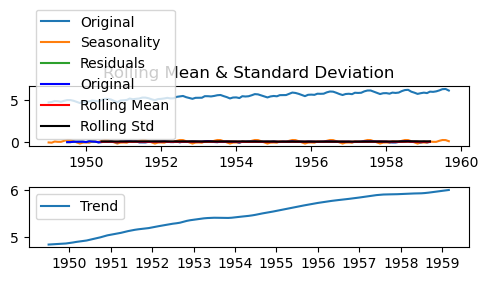

Results of Dickey Fuller Test:
Test Statistic                -6.714155e+00
p-value                        3.617467e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.090000e+02
Critical Value (1%)           -3.491818e+00
Critical Value (5%)           -2.888444e+00
Critical Value (10%)          -2.581120e+00
dtype: float64


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_data_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

# There can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
# any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
    
test_stationarity(decomposedLogData)

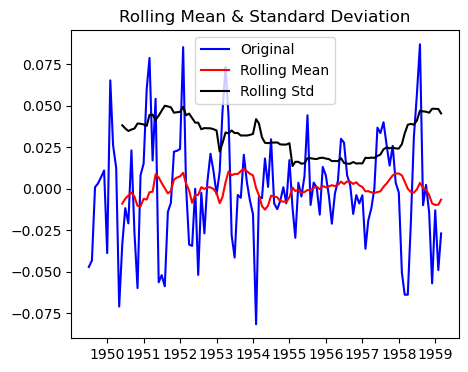

Results of Dickey Fuller Test:
Test Statistic                -6.714155e+00
p-value                        3.617467e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.090000e+02
Critical Value (1%)           -3.491818e+00
Critical Value (5%)           -2.888444e+00
Critical Value (10%)          -2.581120e+00
dtype: float64


In [28]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>
la p-value après la transformation (avec log scale) est significativement plus petite (3.617467e-09 contre 1.549563e-08), indiquant une amélioration significative de la stationnarité.

 les résultats du test de Dickey-Fuller indiquent que la série temporelle des résidus est stationnaire, ce qui est une condition souhaitable pour de nombreuses analyses et modélisations en séries temporelles.
<ul>
    <li><p style="font-size:17px">les résultats du test de Dickey-Fuller indiquent que la série temporelle des résidus est stationnaire</p></li>
    <li><p style="font-size:17px"></p>Le tracé des résidus, de la moyenne mobile et de l'écart type mobile montre que ces courbes sont relativement presque plates et constantes au fil du temps, cela suggère des <b>résidus stationnaires</b>, <b>qu'il n'y a pas de saisonnalité systématique dans les résidus</b> </li>
<li><p style="font-size:17px"><b>Donc  les résidus sont stationnaire ce qui est une condition souhaitable pour de nombreuses pour la démarche  AR (AutoRegressive) et MA (Moving Average) qui  en compte sur la stationnarité des résidus. Si cette hypothèse n'est pas satisfaite, l'interprétation des coefficients devient plus complexe.</b></p></li>
</ul>

# Tracé de l'ACF (Fonction d'Autocorrélation) et du PACF (Fonction d'Autocorrélation Partielle)

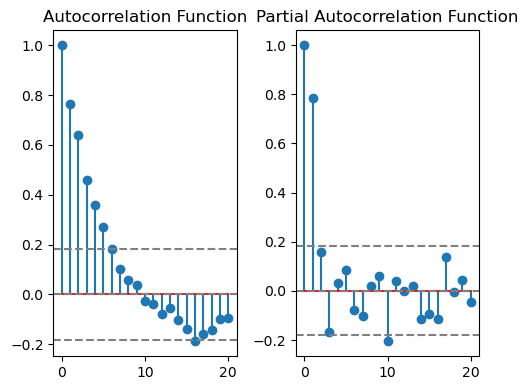

In [29]:
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(stationnarity, nlags=20)
lag_pacf = pacf(stationnarity, nlags=20, method='ols')

# Plot ACF pour déterminer le paramètre p de (AR)
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationnarity)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationnarity)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF déterminer le paramètre q de l'ordre autorégressif (MA) 
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationnarity)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationnarity)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

- D'aprés les plots precedents , on voit bien qu'on a pas vraimment de fortes autocorrelations . entre les données 

**ACF (Autocorrelation Function) :**
- Les deux pics(0.0), (11.5) et (12.5) dépassant la bande de confiance suggèrent une corrélation significative avec les deux lags correspondants.
-  Pour l'ordre de MA(q),on envisage pour q=0,1,2,3,4
- Pour l'ordre de différenciation (d), on envisage pour  d=0 ou 1.

**PACF (Partial Autocorrelation Function) :**

Les trois pics dans le PACF suggèrent des retards significatifs dans la série temporelle.

Cela peut indiquer qu'il y a des composantes AR(p) (AutoRegressive) dans notre série temporelle, où "p" est le nombre de lags significatifs dans le PACF.

- Pour l'ordre AR (p), vous envisagez p=0, 1, 2
- On va donc chercher quelle est la bonne  configuration possible .

<center style="font-size:25px"><b>Building Model</b></center>

Le modèle ARIMA est une combinaison de 3 modèles :

1. AR (p) : Auto-régressif
2. I (d) : Intégré
3. MA (q) : Moyenne mobile

(p, d, q) est appelé l'ordre du modèle ARIMA. Les valeurs de ces paramètres sont basées sur les modèles mentionnés ci-dessus.

- p : Nombre de termes auto-régressifs.
- d : Nombre d'ordres de différenciation nécessaires pour rendre la série temporelle stationnaire.
- q : Nombre de retards des erreurs de prévision dans l'équation de prédiction.

Critères de sélection pour l'ordre du modèle ARIMA :

- p : Valeur de retard où le graphique de l'Autocorrélation Partielle (PACF) coupe ou chute à 0 .
- d : Nombre de fois que la différenciation est effectuée pour rendre la série temporelle stationnaire.
- q : Valeur de retard où le graphique de l'Autocorrélation (ACF) croise l'intervalle de confiance supérieur.

## Model Evaluation(Manual)
- Avant d'evaluer les modèles , il faut créer les fcts requises , pour entrainer les modéles selons les valeurs suggerés , des parametres (p,d,q) , En effet , lorsqu'on a analysé nos données à l'aide des plots d'autocorrelation , on a limité l'intervalle des parametres , ce qui va encore diminuer le temps de recherche

<center style="font-size:25px"><b>Grid Search ARIMA Hyperparameters</b></center>

 - on va utilisé un modèle d'arima , pour la prédiction des nombres de passagers pour un transport aeriens  .
 - il existe plusieurs maniere pour evaluer (BIC,AIC..) nous on va utiliser RMSE
 - Un hyperparamétre c'est une variable qui ne dépend pas des données de problème , il est utilisé pour le réglage .
 - Avant de travailler avec le modèle ARIMA les données doivent étre stationnaires .
 - On va donc utiliser la technique du differencing , pour ceci  on va  utiliser la technique du differencing .

<p style="font-size:20px"><b>Recherche Manuelle des hyperparamètres</b></p>

**Grid Search ARIMA Hyperparameters**

In [30]:
# grid search ARIMA parameters for time series
import warnings
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.5)
    train, test = X[0:train_size], X[train_size:]

    # apply log transformation
    history = numpy.log(train)
    test = numpy.log(test)
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        yhat = numpy.exp(yhat)  # invert log transformation
        predictions.append(yhat)
        history = numpy.append(history, test[t])  # update history with the observed value
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(numpy.exp(test), predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('train_data.csv', header=None, index_col=0, parse_dates=True)

# Convertir le DataFrame en une série en utilisant la fonction squeeze
series = df.squeeze()

# Convertir les valeurs de la série en numériques
series = pd.to_numeric(series, errors='coerce')

# evaluate parameters
p_values = range(0, 4)
d_values = range(2)
q_values = range(0, 3)

evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=155.261


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1) RMSE=94.781


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2) RMSE=66.664


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) RMSE=39.496


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1) RMSE=37.653


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1) RMSE=36.391
ARIMA(1, 1, 2) RMSE=36.170


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sari

ARIMA(2, 1, 1) RMSE=35.673


C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\21269\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

ARIMA(3, 1, 2) RMSE=34.838
Best ARIMA(3, 1, 2) RMSE=34.838


**Best ARIMA(3, 1, 2) RMSE=34.837**

<p style="font-size:20px"><b>Verification des residus</b></p>

- Le but de la modélisation c'est d'expliquer au maximum possible , la variabilité des données, minimiser  les pertes d'information ce qu'on appelle le data leakage .
- Théoriquement parlant  , la distribution des résidus doit etre centré autour de zero , ayant une variance , constante , et de faibles correlations , ce qui est équivalent à un bruit qui ne sert absolument à rien et n'est pas prédictible .
- Parmi les hypothèses du modèle ARIMA , c'est que les résidus sont juste un bruit blanc ,ayant une moyenne de zero , et une variance constante , mais sans correlations , on ne  suppose rien à propos de la distribution du bruit ,ceci d'une part d'une autre part , si on a une distribution qui est proche d'une normal centré réduite c'est un bon signe , puisque cette distribution,s'adapte avec les hypothèses du modèle ARIMA .
- Dans le code suivant on va appliquer la méthode walk forward pour calculer les résidus , cette méthode nous permet d'inclure les données du test pour réestimer le modèle à chaque prédiction faite, ceci nous permet d'augmenter la précision du modèle .

               0
count  64.000000
mean    1.370330
std    11.042997
min   -28.721094
25%    -3.103903
50%     1.406898
75%     8.039275
max    29.044277


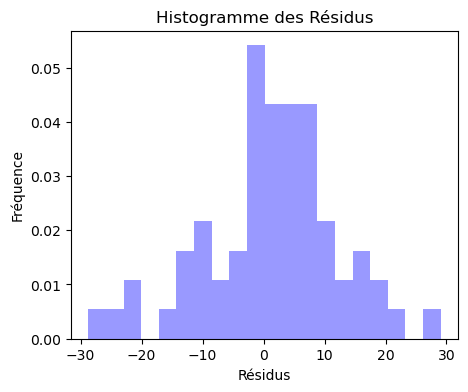

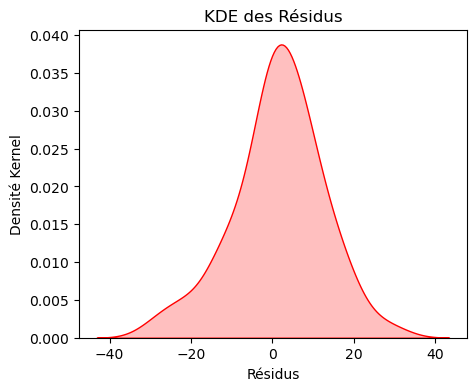

In [31]:
# Verification des residus
# Prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define difference function
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# Define inverse difference function
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('train_data.csv', header=None, index_col=0, parse_dates=True)

# Convertir le DataFrame en une série en utilisant la fonction squeeze
series = df.squeeze()

# Convertir les valeurs de la série en numériques
series = pd.to_numeric(series, errors='coerce')

# Transformation logarithmique
log_series = np.log(series)

# Enlevez les valeurs infinies générées par la transformation logarithmique
log_series.replace([np.inf, -np.inf], np.nan, inplace=True)
log_series.dropna(inplace=True)

X = log_series.values[1:]
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

# Walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # Difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # Predict
    model = ARIMA(diff, order=(3, 1, 2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # Observation
    obs = test[i]
    history.append(obs)

# Inverse transformation logarithmique
predictions_original_scale = np.exp(predictions)

# Inverse transformation logarithmique des données de test
test_original_scale = np.exp(test)

# Errors
residuals = test_original_scale - predictions_original_scale
residuals = pd.DataFrame(residuals)
print(residuals.describe())

# Plot histogram
plt.hist(residuals[0], bins=20, density=True, color='blue', alpha=0.4)
plt.title('Histogramme des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Plot KDE
sns.kdeplot(residuals[0], color='red', fill=True)
plt.title('KDE des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Densité Kernel')
plt.show()


- Ainsi lorsqu'on a calculé les statistiques sommaires à propos des résidus , on trouve une moyenne de :1.43 on va donc l'integrer dans notre modèle pour corriger les prédictions .
- On va tester aprés la performance du modèle sur les données de test

RMSE: 11.163
               0
count  65.000000
mean    0.065383
std    11.249923
min   -39.031205
25%    -8.197374
50%    -0.769010
75%     7.931328
max    24.290286


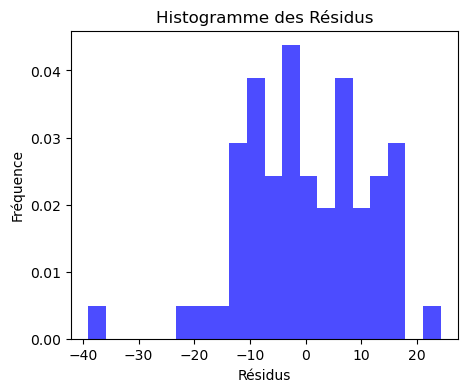

In [32]:

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('train_data.csv', header=None, index_col=0, parse_dates=True)

# Convertir le DataFrame en une série en utilisant la fonction squeeze
series = df.squeeze()

# Convertir les valeurs de la série en numériques
series = pd.to_numeric(series, errors='coerce')

X = series.values[1:]
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 1.38

for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(3,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# Afficher l'histogramme
plt.hist(residuals[0], bins=20, density=True, color='blue', alpha=0.7)
plt.title('Histogramme des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()




- Le plot est proche à une gaussienne c'est un bon signe


<p style="font-size:20px"><b>Verification de corrélations entre les résidus</b></p>

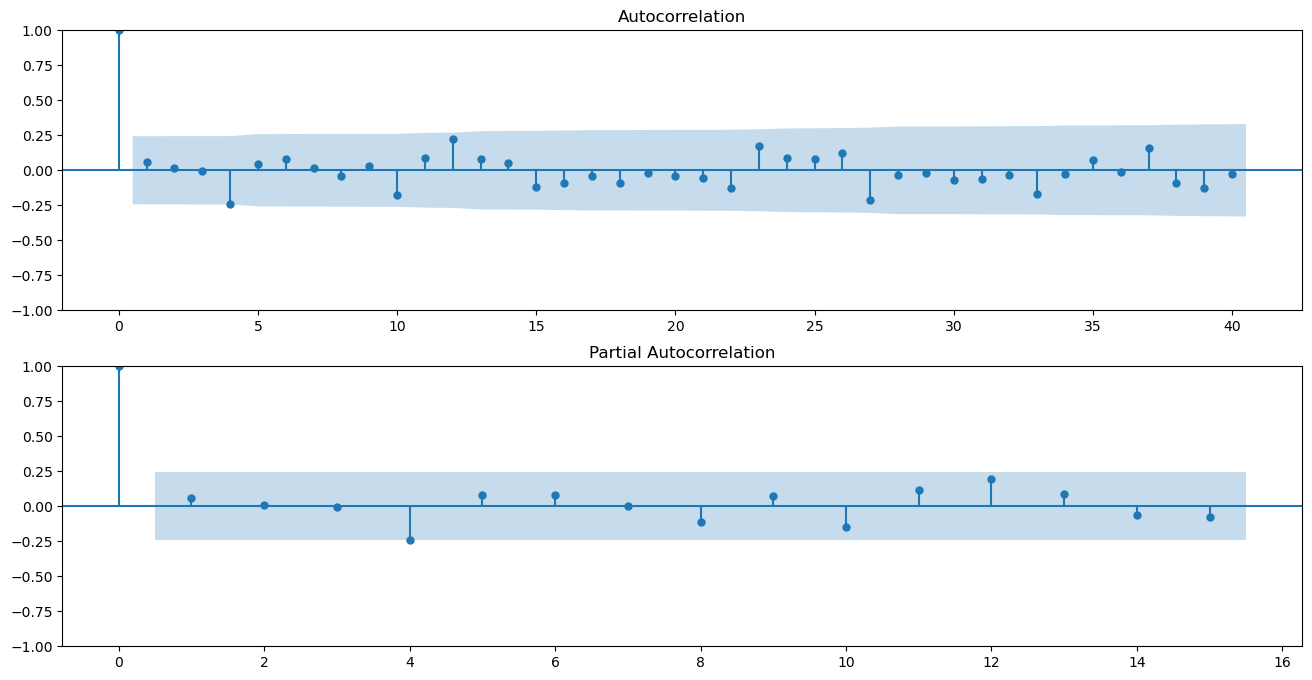

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of residuals
plt.figure(figsize=(16, 8))
plt.subplot(211)
plot_acf(residuals, ax=plt.gca(), lags=40)  # Vous pouvez ajuster le nombre de retards (lags)
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca(), lags=15)  # Ajustez le nombre de retards ici
plt.show()



- Ceci confirme trés bien qu'on a pas vraimment une structure exploitable , dans les résidus 

<center style="font-size:25px"><b>Validation du modèle</b></center>

<p style="font-size:20px"><b>Finalize model</b></p>

In [34]:
# Enregistrer le modèle finale

from statsmodels.tsa.arima.model import ARIMA

#Les données sont déja chargés sous le nom "series"

# prepare data
X = series.values[1:]
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(3, 1, 2))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = 1.38
# Aprés avoir créer le modèle il faut l'enregistrer, c'est pas pratique d'executer toutes les cellules précedentes pour retrouver 
# On va l'enregistrer sous forme d'un fichier pkl (pickled file), et le biais 
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

<p style="font-size:20px"><b>Faire des prédictions</b></p>

In [35]:
# Charger le modèle finalisé
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMAResults

# invert differenced value
X = series.values[1:]
X = X.astype('float32')

months_in_year = 12
#Charger le modéle enregistré récemment
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(X, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 413.150


<p style="font-size:20px"><b>Valider le modèle</b></p>

>Predicted=413.150, Expected=407.000
>Predicted=358.499, Expected=362.000
>Predicted=384.580, Expected=405.000
>Predicted=430.406, Expected=417.000
>Predicted=400.158, Expected=391.000
>Predicted=453.073, Expected=419.000
>Predicted=417.420, Expected=461.000
>Predicted=476.547, Expected=472.000
>Predicted=537.103, Expected=535.000
>Predicted=594.812, Expected=622.000
>Predicted=628.066, Expected=606.000
>Predicted=515.670, Expected=508.000
>Predicted=449.552, Expected=461.000
>Predicted=413.051, Expected=390.000
>Predicted=441.888, Expected=432.000
RMSE: 19.767


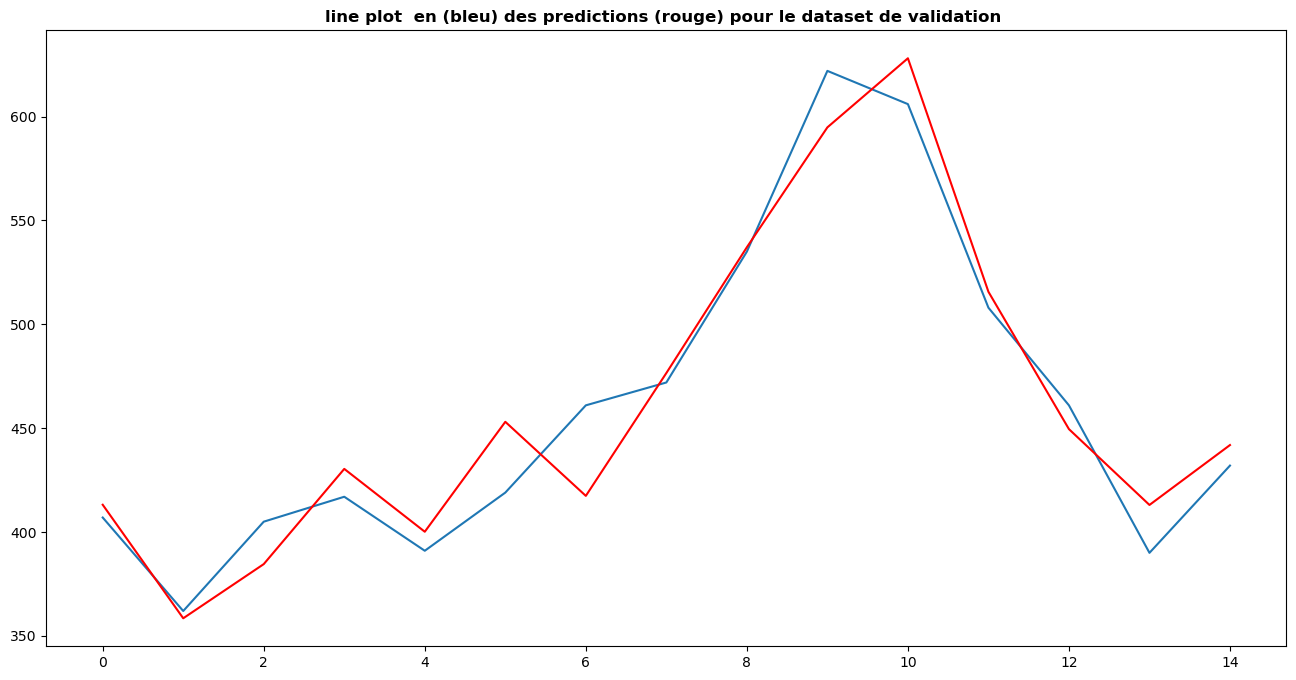

In [36]:
# Charger et Evaluer le modèle finalisé
from sklearn.metrics import mean_absolute_error
# load and prepare datasets
dataset = pd.read_csv('train_data.csv',
                   header=0,
                   index_col=0,
                   parse_dates=True,
                   )
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = pd.read_csv('test_data.csv',
                      header=0,
                      index_col=0,
                      parse_dates=True,
                      )
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(3, 1, 2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    #observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.figure(figsize=(16, 8))
plt.title(
    "line plot  en (bleu) des predictions (rouge) pour le dataset de validation ",
    fontweight='bold')
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

Le graphique présente deux lignes :
Ligne bleue (Validation Set): C'est la série temporelle réelle à partir du fichier CSV 'test_data.csv'.
Ligne rouge (Prédictions): C'est la série temporelle prédite par le modèle ARIMA.
En examinant ce graphique, nous pouvons évaluer visuellement la précision des prédictions par rapport aux valeurs réelles.

Maintenant on passe à la phase d'utilisation d'autres modèles  comme RNN et LSTM,explorer leurs performance ainsi que la différence entre eux et avec le  modèle ARIMA  .

<div style="background-color:yellow; border-radius:20px 0px;">
    <p style="font-size:25px; color:black; padding:15px; margin-left:39%; font-weight:bolder;">LSTM (Long Short-Term Memory)</p>
</div>

<p style="font-size:17px">Nous exploiterons la puissance de l'architecture LSTM pour entraîner un modèle sophistiqué à partir de données de vol, nous permettant de prévoir et d'anticiper les tendances futures dans le domaine de l'aviation.</p>

In [83]:
#Importation des bibliothèques nécessaires
import tensorflow as tf
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.optimizers import Adam
import numpy as np             # pour les calculs numériques comme log, exp, sqrt, etc.
import pandas as pd  # pour la lecture et le stockage des données, le prétraitement
from pandas import read_csv
import matplotlib.pylab as plt



***Tout d’abord, lisons et représentons graphiquement les données***

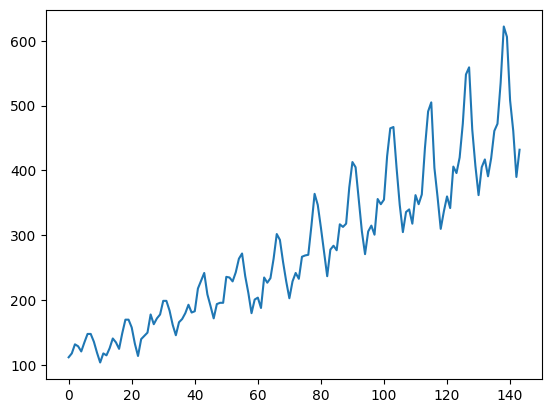

In [84]:
df = pd.read_csv('AirPassengers (1).csv', usecols=[1])
df.head()
plt.plot(df)
plt.show()


**Description du graphique :**
"Le graphique illustre la série temporelle, mettant en évidence une tendance observable, ce qui suggère que les données ne sont pas stationnaires, car la moyenne présente des variations ou ne reste pas constante


**Mise à l'échelle des caractéristiques.**

**2-Normalisation des données :**
Il est généralement recommandé de normaliser les données, en particulier pour les modèles LSTM. Cela peut être fait en utilisant des techniques telles que la normalisation Min-Max.    
Dans cet exemple, nous utilisons une échelle MinMax pour ajuster toutes les valeurs entre 0 et 1. La valeur la plus élevée devient 1, la plus basse devient 0 et tout le reste est interpolé entre les deux


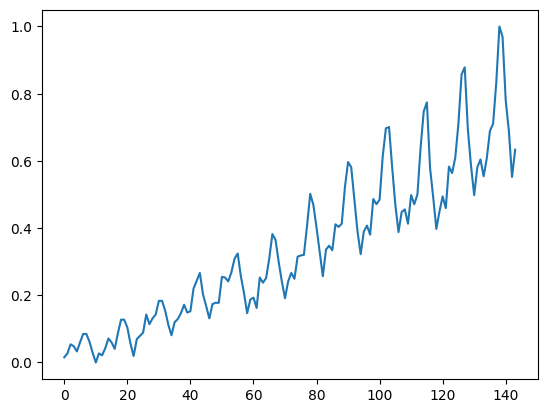

In [85]:

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
plt.plot(df)
plt.show()

In [86]:
train_size = int(len(df) * 0.7)
train, test = df[0:train_size], df[train_size:]

**Maintenant, nous allons formater nos données. Ces données auront un nombre de "look_back" ,X  caractéristiques et une sortie Y.**

In [100]:
def create_dataset(dataset, look_back):
    X,Y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [101]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


**Construction du réseau LSTM**.
<p>Enfin, nous allons construire notre modèle, qui comprendra une couche LSTM suivie de deux couches denses.</p>


In [89]:
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(8))
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 8)                 320       
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Interpretation du resultat :**
Le modèle que nous avons construit est un modèle séquentiel nommé 'sequential_1'. Il se compose de trois couches : une couche LSTM (lstm_1) avec une sortie de forme (None, 8), suivie de deux couches denses (dense_2 et dense_3) avec des sorties de forme (None, 8) et (None, 1) respectivement. Le nombre total de paramètres dans le modèle est de 529, tous ces paramètres étant entraînables pendant l'entraînement.


**Entraînement**



**Maintenant, nous allons compiler le modèle.**

Pour la phase d'entraînement de notre modèle, nous avons utilisé la fonction de perte 'mean_squared_error', qui mesure la moyenne des carrés des différences entre les valeurs prédites et les valeurs réelles. Cela correspond bien à notre problème de régression. En ce qui concerne l'optimiseur, nous avons choisi Adam avec un taux d'apprentissage de 0.001. Adam est un optimiseur populaire qui adapte dynamiquement le taux d'apprentissage pendant l'entraînement, ce qui peut accélérer la convergence du modèle.
Ensuite, nous avons entraîné le modèle avec les données d'entraînement (trainX, trainY) sur 100 époques, chaque lot (batch) comprenant un seul échantillon (batch_size=1). Cette configuration s'adapte à notre ensemble de données AirPassengers. 


In [90]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
history = model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
98/98 [==============================] - 4s 4ms/step - loss: 0.0299
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 4/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 9/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 10/100
98/98 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 11/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 12/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/100
98/98 [=================

**Interpretation du resultat :**
Le modèle a été entraîné sur 100 époques avec une taille de lot (batch_size) de 1. Pendant cette période, la perte moyenne entre les prédictions du modèle et les valeurs réelles a diminué progressivement. Au départ, la perte était plus élevée (0.0159 à la première époque), mais grâce à l'optimisation continue, elle a atteint une valeur plus basse (0.0021 à la 100e époque). Ces résultats indiquent que le modèle a appris à mieux ajuster ses poids pour minimiser la différence entre les prédictions et les valeurs réelles au fil de l'entraînement.


**apres on va tracer les données d'apprentissage**

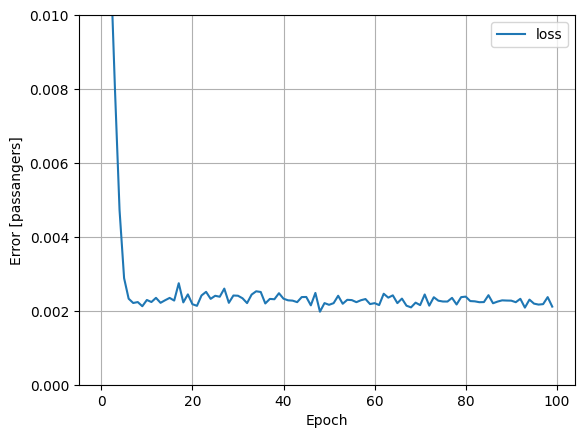

In [91]:
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Error [passangers]')
plt.legend()
plt.grid(True)

**La courbe de la perte (loss) montre une tendance à la baisse, indiquant que le modèle apprend correctement. Plus précisément, au fur et à mesure que le nombre d'époques augmente, l'erreur entre les prédictions du modèle et les valeurs réelles diminue de manière significative.
La limitation de l'axe des y à [0, 0.01] souligne la précision atteinte par notre modèle, où l'erreur est maintenue à des niveaux très bas. Cette convergence vers une faible erreur démontre l'efficacité de l'apprentissage du modèle sur les données d'entraînement.**


**Prédiction**


**Maintenant, nous pouvons passer à la réalisation de quelques prédictions !**

In [92]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 5ms/step
Train Score: 28.72 RMSE
Test Score: 59.39 RMSE


Erreur Quadratique Moyenne (RMSE): Les scores RMSE sont calculés pour les ensembles d'entraînement et de test. Le RMSE de l'ensemble d'entraînement est de 21,66 et celui de l'ensemble de test est de 56.84. Ces valeurs quantifient l'écart entre les prédictions du modèle et les valeurs réelles, indiquant une plus grande erreur sur l'ensemble de test, ce qui peut signaler un surajustement.

**Maintenant, nous pouvons afficher nos prédictions superposées à la vérité fondamentale.**

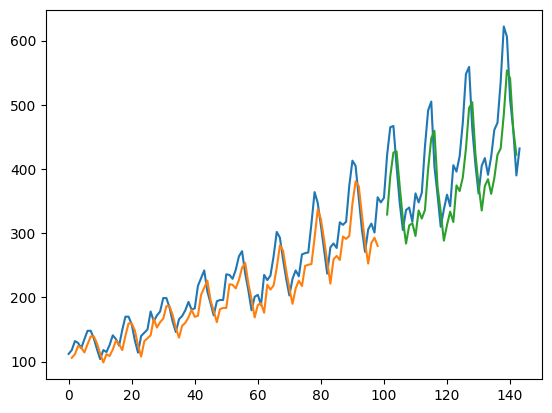

In [93]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


graphe montre les prédictions du modèle par rapport aux données réelles, ce qui aide à visualiser la qualité de l'ajustement.
La série temporelle des valeurs réelles est tracée en bleu, et trainPredictPlot  est tracée en orange et testPredictPlot est tracé en vert


<div style="background-color: yellow; border-radius: 20px 0px; text-align: center;">
    <p style="font-size: 25px; color: black; padding: 15px; margin: auto; font-weight: bolder;">Modélisation avec ANN (Artificial Neural Network)</p>
</div>

In [153]:
from tensorflow import keras  #la création et l'entraînement de modèles d'apprentissage automatique.
from tensorflow.keras import Sequential,layers  #la création de modèles séquentiels
from tensorflow.keras.metrics import RootMeanSquaredError  #Une métrique pour la racine carrée de l'erreur quadratique moyenne
import warnings  #Pour ignorer les avertissements pendant l'exécution du code.
warnings.filterwarnings('ignore')

# Data Visualisation

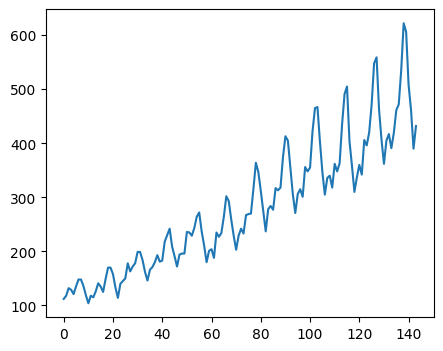

In [154]:
#Chargement des données depuis un fichier CSV :
df = pd.read_csv('AirPassengers (1).csv', usecols=[1])

# Tracé des données originales :
plt.plot(df)
plt.show()

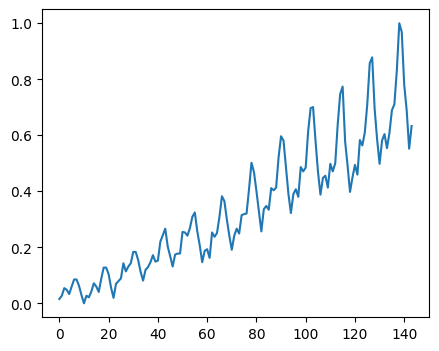

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = scaler.fit_transform(df)  # Normalisation à l'extérieur de la fonction
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)  # Re-création d'un DataFrame

# Affichage des données normalisées
plt.plot(df_normalized)
plt.show()

# Data Preparation

In [156]:
def prepare_data(data, time_span=1):
    x, y = [], []
    for i in range(data.shape[0] - time_span):
        x.append(list(data[i:i + time_span, 0]))
        y.append(data[i + time_span, 0])

    return np.array(x), np.array(y)

# Utilisation de la fonction prepare_data 
x, y = prepare_data(np.array(df_normalized))
print("Shape of x before normalization:", x.shape)
print("Shape of y before normalization:", y.shape)

split_index = int(x.shape[0] * 0.8)
xtrain, xtest, ytrain, ytest = x[:split_index], x[split_index:], y[:split_index], y[split_index:]
print("Shape of xtrain:", xtrain.shape)
print("Shape of xtest:", xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)

Shape of x before normalization: (143, 1)
Shape of y before normalization: (143,)
Shape of xtrain: (114, 1)
Shape of xtest: (29, 1)
Shape of ytrain: (114,)
Shape of ytest: (29,)


# ANN Model

In [157]:


ann = Sequential(
                    [
                        layers.Dense(512,activation='relu',input_shape=(1,)),
                        layers.Dense(1028,activation='relu'),
                        layers.Dense(1,activation='linear')
                    ]
                )

ann.summary()



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 512)               1024      
                                                                 
 dense_53 (Dense)            (None, 1028)              527364    
                                                                 
 dense_54 (Dense)            (None, 1)                 1029      
                                                                 
Total params: 529417 (2.02 MB)
Trainable params: 529417 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ann est une instance de la classe Sequential, qui est un modèle linéaire pour empiler des couches les unes sur les autres.
Le modèle a trois couches denses (fully connected).
La première couche dense a 512 neurones, une fonction d'activation 'relu'.
La deuxième couche dense a 1028 neurones avec une fonction d'activation 'relu'.
La troisième couche dense a 1 neurone avec une fonction d'activation 'linear'.**

In [158]:
ann.compile(loss='mean_squared_error',optimizer='adam',metrics=[RootMeanSquaredError()])
training = ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 85ms/step - loss: 0.0469 - root_mean_squared_error: 0.2166 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 2/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1197
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0056 - root_mean_squared_error: 0.0752 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1503
Epoch 5/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 6/100
4/4 [==============================] - 0s 58ms/step - loss: 0.0033 - root_mean_squared_error: 0.0577 - val_loss: 0.0176 - val_root_mean_sq

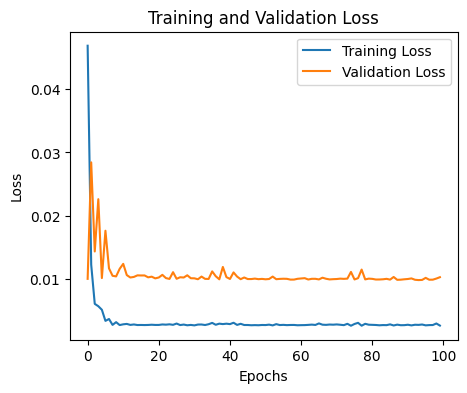

In [159]:
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Tracé de la perte d'entraînement et de validation :**
training.history contient des informations sur la perte et les métriques pendant l'entraînement, collectées à chaque époque.
training.history['loss'] représente la perte d'entraînement à chaque époque.
training.history['val_loss'] représente la perte de validation à chaque époque.


In [160]:

predictions = ann.predict(xtest)
# Inverser la normalisation sur les prédictions
predictions_original = scaler.inverse_transform(predictions)

# Inverser la normalisation sur les vraies valeurs
ytest_original = scaler.inverse_transform(ytest.reshape(-1, 1))

# Comparer les prédictions avec les valeurs réelles
for i in range(len(predictions_original)):
    print(f"Vraie valeur : {ytest_original[i][0]}, Prédiction : {predictions_original[i][0]}")



1/1 [==============================] - 0s 93ms/step
Vraie valeur : 505.0, Prédiction : 472.2619934082031
Vraie valeur : 404.0, Prédiction : 485.25274658203125
Vraie valeur : 359.0, Prédiction : 391.68072509765625
Vraie valeur : 310.0, Prédiction : 350.0198974609375
Vraie valeur : 337.0, Prédiction : 304.6263732910156
Vraie valeur : 360.0, Prédiction : 329.65155029296875
Vraie valeur : 342.0, Prédiction : 350.9456787109375
Vraie valeur : 406.0, Prédiction : 334.2809753417969
Vraie valeur : 396.0, Prédiction : 393.5323791503906
Vraie valeur : 420.0, Prédiction : 384.2743835449219
Vraie valeur : 472.0, Prédiction : 406.502197265625
Vraie valeur : 548.0, Prédiction : 454.6634521484375
Vraie valeur : 559.0, Prédiction : 525.209228515625
Vraie valeur : 463.0, Prédiction : 535.4356079101562
Vraie valeur : 407.0, Prédiction : 446.328369140625
Vraie valeur : 362.0, Prédiction : 394.4581298828125
Vraie valeur : 405.0, Prédiction : 352.7972717285156
Vraie valeur : 417.0, Prédiction : 392.60656738

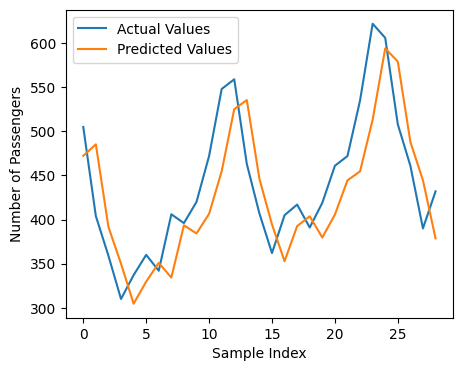

In [161]:

# Comparer les prédictions avec les valeurs réelles
plt.plot(ytest_original, label='Actual Values')
plt.plot(predictions_original, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

La série temporelle des valeurs réelles (ytest) est tracée en bleu, et la série temporelle des valeurs prédites (predictions) est tracée en orange.


In [162]:
# Calcul des erreurs pour les ensembles d'entraînement et de test
trainPredict = ann.predict(xtrain)
testPredict = ann.predict(xtest)

# Inverser la normalisation sur les prédictions et les vraies valeurs pour l'ensemble d'entraînement
trainPredict_original = scaler.inverse_transform(trainPredict)
ytrain_original = scaler.inverse_transform(ytrain.reshape(-1, 1))

# Inverser la normalisation sur les prédictions et les vraies valeurs pour l'ensemble de test
testPredict_original = scaler.inverse_transform(testPredict)
ytest_original = scaler.inverse_transform(ytest.reshape(-1, 1))

# Calculer et afficher les erreurs RMSE pour les ensembles d'entraînement et de test
trainScore = np.sqrt(mean_squared_error(ytrain_original, trainPredict_original))
testScore = np.sqrt(mean_squared_error(ytest_original, testPredict_original))

print('Train Score: %.2f RMSE' % trainScore)
print('Test Score: %.2f RMSE' % testScore)

1/1 [==============================] - 0s 35ms/step
Train Score: 27.39 RMSE
Test Score: 52.43 RMSE
